<a href="https://colab.research.google.com/github/Ravi-7077/ML-projects/blob/main/cryptopredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib
from zipfile import ZipFile
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
with ZipFile('/content/sample_data/crypto/archive (21).zip') as zip_ref:
  zip_ref.extractall()

In [ ]:
aave=pd.read_csv('/content/coin_Aave.csv')

In [ ]:
aave.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Aave,AAVE,2020-10-05 23:59:59,55.112358,49.787900,52.675035,53.219243,0.000000e+00,8.912813e+07
1,2,Aave,AAVE,2020-10-06 23:59:59,53.402270,40.734578,53.291969,42.401599,5.830915e+05,7.101144e+07
2,3,Aave,AAVE,2020-10-07 23:59:59,42.408314,35.970690,42.399947,40.083976,6.828342e+05,6.713004e+07
3,4,Aave,AAVE,2020-10-08 23:59:59,44.902511,36.696057,39.885262,43.764463,1.658817e+06,2.202651e+08
4,5,Aave,AAVE,2020-10-09 23:59:59,47.569533,43.291776,43.764463,46.817744,8.155377e+05,2.356322e+08


In [ ]:
aave.describe()

,SNo,High,Low,Open,Close,Volume,Marketcap
count,275.000000,275.000000,275.000000,275.000000,275.000000,2.750000e+02,2.750000e+02
mean,138.000000,271.306751,237.736035,254.506688,255.525845,5.023421e+08,3.168639e+09
std,79.529869,173.030432,151.302431,162.067209,161.649917,4.527200e+08,2.066558e+09
min,1.000000,28.433069,25.966155,27.715080,27.715084,0.000000e+00,6.713004e+07
25%,69.500000,85.078206,76.038104,80.557436,81.100120,2.400042e+08,9.736814e+08
50%,138.000000,306.990536,274.746278,292.268571,295.089229,3.693558e+08,3.697227e+09
75%,206.500000,407.518278,361.685763,382.275163,382.579255,6.204643e+08,4.784464e+09
max,275.000000,666.864979,565.749887,629.231665,632.266488,2.838573e+09,8.063210e+09


In [ ]:
aave.shape

(275, 10)

In [ ]:
aave.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        275 non-null    int64  
 1   Name       275 non-null    object 
 2   Symbol     275 non-null    object 
 3   Date       275 non-null    object 
 4   High       275 non-null    float64
 5   Low        275 non-null    float64
 6   Open       275 non-null    float64
 7   Close      275 non-null    float64
 8   Volume     275 non-null    float64
 9   Marketcap  275 non-null    float64
dtypes: float64(6), int64(1), object(3)
memory usage: 21.6+ KB


In [ ]:
aave.isnull().sum()

,0
SNo,0
Name,0
Symbol,0
Date,0
High,0
Low,0
Open,0
Close,0
Volume,0
Marketcap,0


In [ ]:

aave.index=pd.to_datetime(aave.Date)

In [ ]:
aave.drop(['SNo','Symbol','Name','Volume','Marketcap','Date'],axis=1,inplace=True)

In [ ]:
aave

,High,Low,Open,Close
Date,,,,
2020-10-05 23:59:59,55.112358,49.787900,52.675035,53.219243
2020-10-06 23:59:59,53.402270,40.734578,53.291969,42.401599
2020-10-07 23:59:59,42.408314,35.970690,42.399947,40.083976
2020-10-08 23:59:59,44.902511,36.696057,39.885262,43.764463
2020-10-09 23:59:59,47.569533,43.291776,43.764463,46.817744
...,...,...,...,...
2021-07-02 23:59:59,234.483957,215.951539,230.814119,233.948437
2021-07-03 23:59:59,265.107342,228.485206,234.208478,259.655225
2021-07-04 23:59:59,289.001124,248.285491,259.399426,277.038792


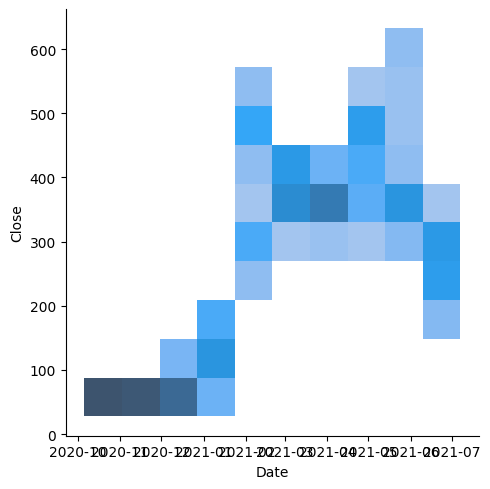

In [ ]:
sns.displot(data=aave,x=aave.index,y='Close')

<Axes: xlabel='Date'>

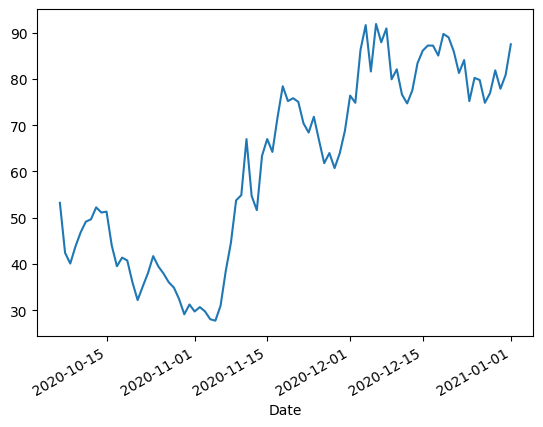

In [ ]:
aave['Close'].loc[(aave.index<'01-01-2021')].plot()

In [ ]:
y=aave['Close']
x=aave.drop(['Close'],axis=1)

In [ ]:
x_train,x_text,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=11)

In [ ]:
x_train
#y_train

,High,Low,Open
Date,,,
2021-01-01 23:59:59,90.349671,85.125597,87.543306
2021-04-18 23:59:59,432.980906,292.775389,430.181499
2020-10-05 23:59:59,55.112358,49.787900,52.675035
2021-01-26 23:59:59,281.717889,241.927677,249.198164
2021-05-21 23:59:59,494.548437,310.490526,467.526357
...,...,...,...
2021-03-15 23:59:59,389.069256,358.239003,380.700944
2021-07-01 23:59:59,251.974412,227.691419,250.710438
2021-01-04 23:59:59,111.899874,88.201610,91.230496


In [ ]:
aave.corr()

,High,Low,Open,Close
High,1.000000,0.986692,0.993092,0.993260
Low,0.986692,1.000000,0.987773,0.993655
Open,0.993092,0.987773,1.000000,0.986409
Close,0.993260,0.993655,0.986409,1.000000


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor()

In [ ]:
model.fit(x_train,y_train)

GradientBoostingRegressor()

In [ ]:
x_trainpreds=model.predict(x_train)
x_train

,High,Low,Open
Date,,,
2021-01-01 23:59:59,90.349671,85.125597,87.543306
2021-04-18 23:59:59,432.980906,292.775389,430.181499
2020-10-05 23:59:59,55.112358,49.787900,52.675035
2021-01-26 23:59:59,281.717889,241.927677,249.198164
2021-05-21 23:59:59,494.548437,310.490526,467.526357
...,...,...,...
2021-03-15 23:59:59,389.069256,358.239003,380.700944
2021-07-01 23:59:59,251.974412,227.691419,250.710438
2021-01-04 23:59:59,111.899874,88.201610,91.230496


In [ ]:
val=pd.Series(x_trainpreds)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
x_train_acuuracy=accuracy_score(val,y_train)

R-squared score for the training data: 0.9994207448046395


In [ ]:
model.score(x_train,y_train)
x_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 192 entries, 2021-01-01 23:59:59 to 2021-04-14 23:59:59
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   High    192 non-null    float64
 1   Low     192 non-null    float64
 2   Open    192 non-null    float64
dtypes: float64(3)
memory usage: 6.0 KB


In [ ]:
model.score(x_text,y_test)

0.9935221733042633

In [ ]:
man_input=[430.78858392,387.57605277,398.21019792]
def reshape(man_input):
  input_array=np.asarray(man_input)
  input_reshape=input_array.reshape(1,-1)
  return input_reshape


In [ ]:
preds=model.predict(reshape(man_input))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


In [ ]:
preds

array([423.39322583])

In [ ]:
print(model.score(input_reshape,output_reshape))

nan


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [ ]:
import glob
path = r'/content/sample_data/crypto'
all_files = glob.glob(path + "/*.csv")

In [ ]:
df = pd.concat((pd.read_csv(file) for file in all_files), ignore_index=True)
#df = ((pd.read_csv(file) for file in all_files),ignore_index=True)

In [ ]:
df

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,EOS,EOS,2017-07-02 23:59:59,2.877510,0.822648,0.996521,2.710050,3.204520e+08,0.000000e+00
1,2,EOS,EOS,2017-07-03 23:59:59,5.395970,2.632310,2.717390,4.086640,4.149500e+08,6.549307e+08
2,3,EOS,EOS,2017-07-04 23:59:59,4.191240,2.933450,4.098010,3.372000,2.185590e+08,5.501552e+08
3,4,EOS,EOS,2017-07-05 23:59:59,3.523500,2.730130,3.356000,3.003230,1.243390e+08,5.006264e+08
4,5,EOS,EOS,2017-07-06 23:59:59,3.867470,3.007830,3.014260,3.361330,1.774630e+08,5.683615e+08
...,...,...,...,...,...,...,...,...,...,...
35692,1438,Binance Coin,BNB,2021-07-02 23:59:59,290.621683,277.350302,287.754456,287.423094,1.133633e+09,4.410016e+10
35693,1439,Binance Coin,BNB,2021-07-03 23:59:59,302.605867,283.434010,287.215592,298.237117,1.113777e+09,4.575938e+10
35694,1440,Binance Coin,BNB,2021-07-04 23:59:59,314.713019,292.787370,298.113557,307.732096,1.387396e+09,4.721623e+10
35695,1441,Binance Coin,BNB,2021-07-05 23:59:59,307.684855,293.523465,307.684855,302.377980,1.504870e+09,4.639473e+10


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35697 entries, 0 to 35696
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        35697 non-null  int64  
 1   Name       35697 non-null  object 
 2   Symbol     35697 non-null  object 
 3   Date       35697 non-null  object 
 4   High       35697 non-null  float64
 5   Low        35697 non-null  float64
 6   Open       35697 non-null  float64
 7   Close      35697 non-null  float64
 8   Volume     35697 non-null  float64
 9   Marketcap  35697 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 2.7+ MB


In [ ]:
new=df[df['Name']=="Cosmos"].copy()

In [ ]:
new

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
5899,1,Cosmos,ATOM,2019-03-15 23:59:59,7.715249,6.432468,6.633174,7.504351,6.057301e+06,0.000000e+00
5900,2,Cosmos,ATOM,2019-03-16 23:59:59,8.305615,6.694531,7.507990,7.383882,3.477393e+06,0.000000e+00
5901,3,Cosmos,ATOM,2019-03-17 23:59:59,7.357443,4.727895,7.357443,4.776164,2.653565e+06,0.000000e+00
5902,4,Cosmos,ATOM,2019-03-18 23:59:59,5.229982,4.828242,4.828242,5.110341,2.567201e+06,0.000000e+00
5903,5,Cosmos,ATOM,2019-03-19 23:59:59,5.206172,4.794501,5.099978,4.821883,3.891084e+06,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...
6739,841,Cosmos,ATOM,2021-07-02 23:59:59,11.764925,10.543935,11.048080,11.764925,1.891418e+08,2.559039e+09
6740,842,Cosmos,ATOM,2021-07-03 23:59:59,12.198276,11.540298,11.791034,11.817927,1.551317e+08,2.571184e+09
6741,843,Cosmos,ATOM,2021-07-04 23:59:59,12.433965,11.520693,11.799601,12.263548,1.449177e+08,2.668775e+09
6742,844,Cosmos,ATOM,2021-07-05 23:59:59,13.968271,11.955753,12.320437,13.548475,4.489358e+08,2.949102e+09


In [ ]:
def cryptoprice(name,model):
 new=df[df['Name']==name].copy()
 x=new[['High','Low','Open']]
 y=new['Close']
 x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=11)
 model.fit(x_train,y_train)
 preds=model.predict(x_test)
 print(model.score(x_test,y_test),"\t these are just predicted score not to be conidered the values would be accurtae")
 choice=input("would you like to try custom test it on custom input of HIGH LOW and OPEN (y/n)")
 if choice=='y':
  in_array=float(input("enter the values in the form of array"))
  print(model.predict(reshape(in_array)))
 else:
  return

In [ ]:
crypto_name=input('enter the cypto name')
cryptoprice(crypto_name,model)


enter the cypto nameAave
0.9941651465949234 	 these are just predicted score not to be conidered the values would be accurtae
would you like to try custom test it on custom input of HIGH LOW and OPEN (y/n)n
